In [1]:
import module
import matplotlib.pyplot as plt
#vds
Vds=10
Vds_comp=0.1
    
#vgs
Vgs_start=2
Vgs_stop=-8
Vgs_step=-0.05
Vgs_comp= 0.01
    
time='MED'
device = module.HP4155a('GPIB0::17::INSTR')
    
#setup device
device.reset()
device.measurement_mode('SWE')

device.disable_vsu(1)
device.disable_vsu(2)
device.disable_vmu(1)
device.disable_vmu(2)

#smu1 
device.smu_vname(1,'VS1')
device.smu_iname(1,'IS1')
device.smu_mode_meas(1,'COMM')
device.smu_function_sweep(1,'CONS')
    
#smu2
device.smu_vname(2,'VDS')
device.smu_iname(2,'ID')
device.smu_mode_meas(2,'V')
device.smu_function_sweep(2,'CONS')
device.cons_smu_value(2,Vds)
device.const_comp(2,Vds_comp)
    
#smu3
device.smu_vname(3,'VGS')
device.smu_iname(3,'IG')
device.smu_mode_meas(3,'V')
device.smu_function_sweep(3,'VAR1')
    
#smu4
device.smu_vname(4,'VS2')
device.smu_iname(4,'IS2')
device.smu_mode_meas(4,'COMM')
device.smu_function_sweep(4,'CONS')
    
#var1 setup
device.start_value_sweep(Vgs_start)
device.step_sweep(Vgs_step)
device.stop_value_sweep(Vgs_stop)
device.comp('VAR1',Vgs_comp)
device.integration_time(time)
    
#user functions
device.user_function('Gm','mS/mm','1E4*DIFF(ID,VGS)')
device.user_function('IDmm','mA/mm','1E4*ID')
device.user_function('IGmm','mA/mm','1E4*IG')
device.user_function('ABSIDm','mA/mm','ABS(IDmm)')
device.user_function('ABSIGm','mA/mm','ABS(IGmm)')
    
#display
device.display_variable('X','VGS')
device.display_variable('Y1','IDmm')
device.display_variable('Y2','Gm')
    
device.single_measurement()
while device.operation_completed() == False:
    pass
        
device.autoscaling()
#return data from the device

In [2]:
Vgs=device.return_data('VGS')
Idmm=device.return_data('IDmm')
gm=device.return_data('Gm')

print(Vgs)
print(len(Vgs))
print(Idmm)
print(len(Idmm))
print(gm)
print(len(gm))

[2.0, 1.95, 1.9, 1.85, 1.8, 1.75, 1.7, 1.65, 1.6, 1.55, 1.5, 1.45, 1.4, 1.35, 1.3, 1.25, 1.2, 1.15, 1.1, 1.05, 1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0, -0.05, -0.1, -0.15, -0.2, -0.25, -0.3, -0.35, -0.4, -0.45, -0.5, -0.55, -0.6, -0.65, -0.7, -0.75, -0.8, -0.85, -0.9, -0.95, -1.0, -1.05, -1.1, -1.15, -1.2, -1.25, -1.3, -1.35, -1.4, -1.45, -1.5, -1.55, -1.6, -1.65, -1.7, -1.75, -1.8, -1.85, -1.9, -1.95, -2.0, -2.05, -2.1, -2.15, -2.2, -2.25, -2.3, -2.35, -2.4, -2.45, -2.5, -2.55, -2.6, -2.65, -2.7, -2.75, -2.8, -2.85, -2.9, -2.95, -3.0, -3.05, -3.1, -3.15, -3.2, -3.25, -3.3, -3.35, -3.4, -3.45, -3.5, -3.55, -3.6, -3.65, -3.7, -3.75, -3.8, -3.85, -3.9, -3.95, -4.0, -4.05, -4.1, -4.15, -4.2, -4.25, -4.3, -4.35, -4.4, -4.45, -4.5, -4.55, -4.6, -4.65, -4.7, -4.75, -4.8, -4.85, -4.9, -4.95, -5.0, -5.05, -5.1, -5.15, -5.2, -5.25, -5.3, -5.35, -5.4, -5.45, -5.5, -5.55, -5.6, -5.65, -5.7, -5.75, -5.8, -5.85, -5.9, -5.95, 

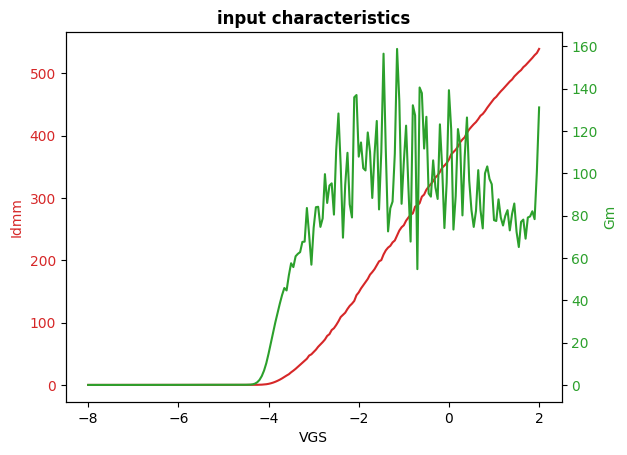

In [3]:
fig, ax1 = plt.subplots() 
 
color = 'tab:red'
ax1.set_xlabel('VGS') 
ax1.set_ylabel('Idmm', color = color) 
ax1.plot(Vgs, Idmm, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
 
color = 'tab:green'
ax2.set_ylabel('Gm', color = color) 
ax2.plot(Vgs, gm, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
 
# Adding title
plt.title('input characteristics', fontweight ="bold") 
 
# Show plot
plt.show()